In [1]:
import torch 
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# model = torchvision.models.detection.ssd300_vgg16(pretrained = True)

In [73]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [74]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [75]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'

--2023-02-08 05:43:47--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.101.123, 52.217.100.148, 52.217.173.241, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.101.123|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg.2’

000000037777.jpg.2  100%[===================>]  39.88K  --.-KB/s    in 0.1s    

2023-02-08 05:43:47 (407 KB/s) - ‘000000037777.jpg.2’ saved [40833/40833]



In [19]:
# igg = Image.open('/content/000000037777.jpg')

In [76]:
igg = Image.open('/content/000000037777.jpg')

In [77]:
transform = T.ToTensor()
img = transform(igg)

In [78]:
with torch.no_grad():
  pred = model([img])

In [79]:
pred

[{'boxes': tensor([[291.1581,  75.6388, 351.1081, 230.0000],
          [137.2317, 126.4134, 196.8073, 192.6794],
          [234.0298, 187.5376, 257.2587, 206.0069],
          [ 69.8431, 180.6237, 294.8976, 227.8892],
          [215.5546, 186.7090, 232.4908, 201.2714],
          [229.2052, 178.4287, 242.4043, 189.1334],
          [102.2816, 119.1606, 109.7579, 136.2550],
          [204.3586, 187.4953, 220.2825, 207.8441],
          [217.1612, 200.5048, 231.4939, 214.6144],
          [231.3621, 200.6434, 247.9374, 217.5594],
          [202.8858, 180.7723, 259.0847, 215.1571],
          [265.9250, 134.4927, 293.7535, 137.7777],
          [ 98.9475, 120.0403, 110.6324, 175.7940],
          [232.8049, 188.9269, 247.0089, 201.1433],
          [256.9217, 132.6738, 295.4498, 138.2876],
          [175.0697, 111.2454, 185.6406, 137.4315],
          [195.5084, 120.2847, 202.1774, 134.7075],
          [263.7627, 129.0698, 299.0514, 137.4496],
          [196.6427, 181.2184, 263.6159, 219.1484],
   

In [80]:
type(pred[0])

dict

In [81]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [82]:
boxes, scores, labels = pred[0]['boxes'], pred[0]['scores'], pred[0]['labels']

In [83]:
boxes

tensor([[291.1581,  75.6388, 351.1081, 230.0000],
        [137.2317, 126.4134, 196.8073, 192.6794],
        [234.0298, 187.5376, 257.2587, 206.0069],
        [ 69.8431, 180.6237, 294.8976, 227.8892],
        [215.5546, 186.7090, 232.4908, 201.2714],
        [229.2052, 178.4287, 242.4043, 189.1334],
        [102.2816, 119.1606, 109.7579, 136.2550],
        [204.3586, 187.4953, 220.2825, 207.8441],
        [217.1612, 200.5048, 231.4939, 214.6144],
        [231.3621, 200.6434, 247.9374, 217.5594],
        [202.8858, 180.7723, 259.0847, 215.1571],
        [265.9250, 134.4927, 293.7535, 137.7777],
        [ 98.9475, 120.0403, 110.6324, 175.7940],
        [232.8049, 188.9269, 247.0089, 201.1433],
        [256.9217, 132.6738, 295.4498, 138.2876],
        [175.0697, 111.2454, 185.6406, 137.4315],
        [195.5084, 120.2847, 202.1774, 134.7075],
        [263.7627, 129.0698, 299.0514, 137.4496],
        [196.6427, 181.2184, 263.6159, 219.1484],
        [218.0665, 199.1213, 245.9161, 217.2953],


In [92]:
scores

tensor([0.9948, 0.9876, 0.9607, 0.9142, 0.9010, 0.8968, 0.8795, 0.8744, 0.8511,
        0.8308, 0.8022, 0.7680, 0.7506, 0.6588, 0.5832, 0.5827, 0.5032, 0.4856,
        0.4782, 0.4444, 0.4423, 0.4268, 0.4094, 0.3944, 0.3695, 0.3230, 0.3197,
        0.3106, 0.3040, 0.3019, 0.2771, 0.2652, 0.2372, 0.2323, 0.2232, 0.2125,
        0.1745, 0.1729, 0.1718, 0.1622, 0.1545, 0.1421, 0.1414, 0.1281, 0.1193,
        0.1091, 0.0857, 0.0817, 0.0778, 0.0726, 0.0725, 0.0705, 0.0678, 0.0617,
        0.0595, 0.0589, 0.0539, 0.0535, 0.0522, 0.0520, 0.0510, 0.0507])

In [93]:
len(labels)

62

In [113]:
num = torch.argwhere(scores>0.8).shape[0]

In [114]:
num

11

In [115]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [116]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [117]:
import numpy as np

In [120]:
ig = cv2.imread('/content/000000037777.jpg')
for i in range(num):
  x1,y1,x2,y2 = boxes[i].numpy().astype('int')
  ig = cv2.rectangle(ig,(x1,y1),(x2,y2),(0,0,255),1)
  class_name = coco_names[labels.numpy()[i]-1]
  ig = cv2.putText(ig,class_name,(x1+3,y1-10),font,0.5,(255,0,0),1,cv2.LINE_AA)

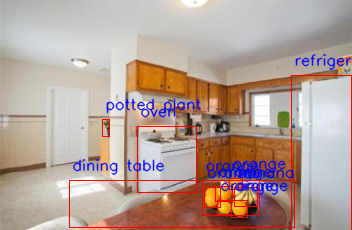

In [121]:
cv2_imshow(ig)